In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit as cf

In [19]:
active_cases = [3, 9, 10, 12, 9, 5, 2, 4, 5, 10, 23, 30, 31]
days_since_classes = [0, 2, 4, 7, 9, 11, 14, 16, 18, 21, 23, 25, 28]

In [20]:
interp = interp1d(days_since_classes, active_cases, kind='quadratic', fill_value='extrapolate')

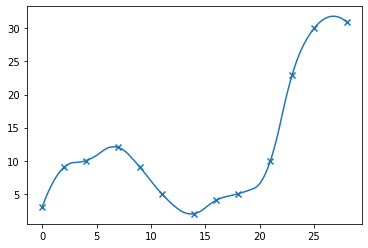

In [21]:
plt.scatter(days_since_classes, active_cases, marker='x')
plt.plot(np.linspace(0, 28, 100), interp(np.linspace(0,28,100)))
plt.show()

In [22]:
def expon(x,lamb):
    return np.exp((x)/lamb)

In [23]:
fit = cf(expon, days_since_classes, active_cases)

In [24]:
fit

(array([7.90906177]), array([[0.08210631]]))

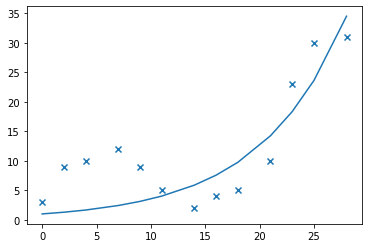

In [25]:
plt.scatter(days_since_classes, active_cases, marker='x')
plt.plot(days_since_classes, expon(days_since_classes,fit[0][0]))
plt.show()

In [26]:
list_of_neighboring_days = []
list_of_neighboring_cases = []
for i in range(2, len(days_since_classes)-2):
    list_of_neighboring_days.append(np.array(days_since_classes[i-2:i+3]))
    list_of_neighboring_cases.append(np.array(active_cases[i-2:i+3]))
    
for i in range(0, len(list_of_neighboring_days)):
    list_of_neighboring_days[i] -= list_of_neighboring_days[i][0]
    list_of_neighboring_cases[i] -= list_of_neighboring_cases[i][0]
list_of_neighboring_cases = np.abs(list_of_neighboring_cases)

In [27]:
display(list_of_neighboring_cases)
display(list_of_neighboring_days)

array([[ 0,  6,  7,  9,  6],
       [ 0,  1,  3,  0,  4],
       [ 0,  2,  1,  5,  8],
       [ 0,  3,  7, 10,  8],
       [ 0,  4,  7,  5,  4],
       [ 0,  3,  1,  0,  5],
       [ 0,  2,  3,  8, 21],
       [ 0,  1,  6, 19, 26],
       [ 0,  5, 18, 25, 26]])

[array([0, 2, 4, 7, 9]),
 array([0, 2, 5, 7, 9]),
 array([ 0,  3,  5,  7, 10]),
 array([0, 2, 4, 7, 9]),
 array([0, 2, 5, 7, 9]),
 array([ 0,  3,  5,  7, 10]),
 array([0, 2, 4, 7, 9]),
 array([0, 2, 5, 7, 9]),
 array([ 0,  3,  5,  7, 10])]

In [28]:
residuals = []
lambds = []
for i, val in enumerate(list_of_neighboring_days):
    fit = cf(expon, val, list_of_neighboring_cases[i])
    display(fit)
    residuals.append(fit[1][0][0])
    lambds.append(fit[0][0])

(array([4.19215658]), array([[0.62118506]]))

(array([8.30271892]), array([[9.99600629]]))

(array([4.82053041]), array([[0.08806366]]))

(array([3.85330159]), array([[0.20946948]]))

(array([5.11512826]), array([[1.42645648]]))

(array([7.56506896]), array([[5.40318377]]))

(array([3.00321426]), array([[0.00419131]]))

(array([2.70017371]), array([[0.00692194]]))

(array([2.92045499]), array([[0.06833521]]))

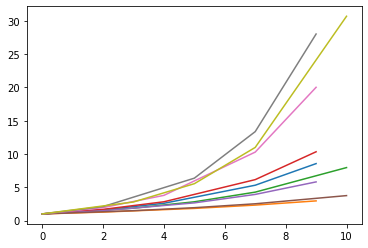

In [29]:
for i in range(0, len(list_of_neighboring_days)):
    plt.plot(list_of_neighboring_days[i], expon(list_of_neighboring_days[i], lambds[i]))
plt.show()

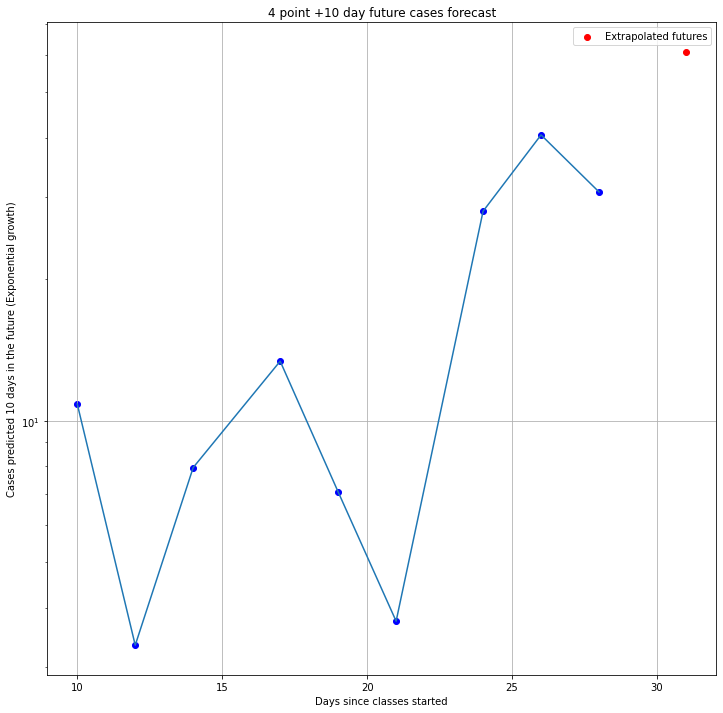

In [39]:
#Moving 10 day future total active cases forcast for exponential fit computed using 4 point moving average
plt.figure(figsize=(12,12))
plt.title("4 point +10 day future cases forecast")
plt.xlabel("Days since classes started")
plt.ylabel("Cases predicted 10 days in the future (Exponential growth)")

for i, val in enumerate(days_since_classes[0:-4]):
    plt.scatter(val+10, expon(10, lambds[i]), color='blue')
plt.plot(10+np.array(days_since_classes[:-4]), expon(10, np.array(lambds)))
#plt.scatter(16+10, expon(11, lambds[-1]),color='red', label='predicition')
#plt.scatter(18+10, expon(13, lambds[-1]), color='red')
plt.scatter(31, expon(12, lambds[-1]), color='red', label='Extrapolated futures')
plt.grid()
plt.yscale("log")
plt.legend()
plt.savefig("covid_sep21_cuse.png")

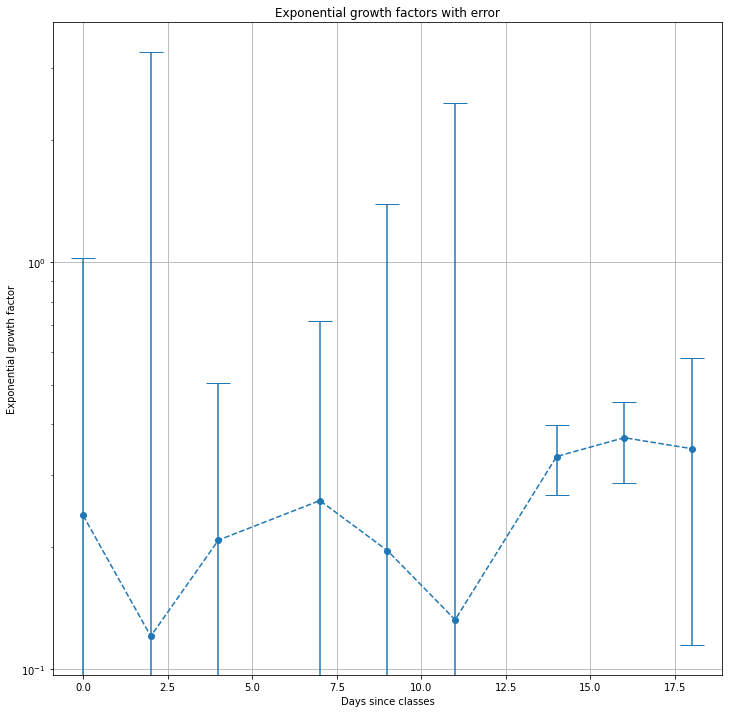

In [18]:
plt.figure(figsize=(12,12))
plt.title(r"Exponential growth factors with error")
plt.errorbar(days_since_classes[:-4], 1./np.array(lambds), yerr=np.sqrt(residuals), fmt='--o', capsize=12)
plt.xlabel("Days since classes")
plt.ylabel("Exponential growth factor")
plt.yscale('log')
plt.grid()

plt.savefig("growth_factor_error.png")